In [22]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# Importing the Data
df=pd.read_csv('Clean_Dataset.csv')

In [24]:
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [26]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [31]:
columns_to_treat = ['duration', 'days_left', 'price']
df[columns_to_treat].describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [32]:
def treat_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers by setting values outside of the bounds to the boundary values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Apply IQR method to 'duration', 'days_left', and 'price' columns
for column in columns_to_treat:
    df = treat_outliers_iqr(df, column)

# Display the result after outlier treatment
df[columns_to_treat].describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.199951,26.004751,20887.402112
std,7.131314,13.561004,22689.507652
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,30.180000,49.000000,99128.000000


In [33]:
print('Dataframe dimensions:', df.shape)

# Create the tab_info DataFrame with data types, null values, and percentage of null values
tab_info = pd.DataFrame({
    'Column Type': df.dtypes,                        # Column data types
    'Null Values (Count)': df.isnull().sum(),        # Count of null values
    'Null Values (%)': (df.isnull().sum() / df.shape[0]) * 100  # Percentage of null values
})

# Display the tab_info DataFrame
tab_info.head(31)


Dataframe dimensions: (300153, 11)


,Column Type,Null Values (Count),Null Values (%)
airline,object,0,0.0
flight,object,0,0.0
source_city,object,0,0.0
departure_time,object,0,0.0
stops,object,0,0.0
arrival_time,object,0,0.0
destination_city,object,0,0.0
class,object,0,0.0
duration,float64,0,0.0
days_left,int64,0,0.0


In [34]:
# Size of the data
df.shape

(300153, 11)

In [35]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

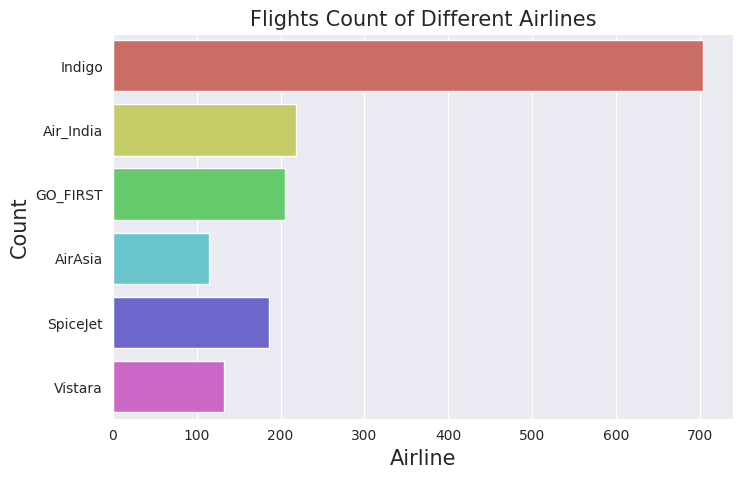

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [37]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

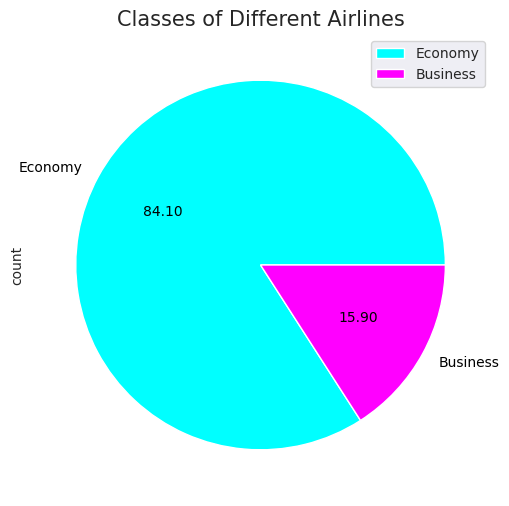

In [38]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

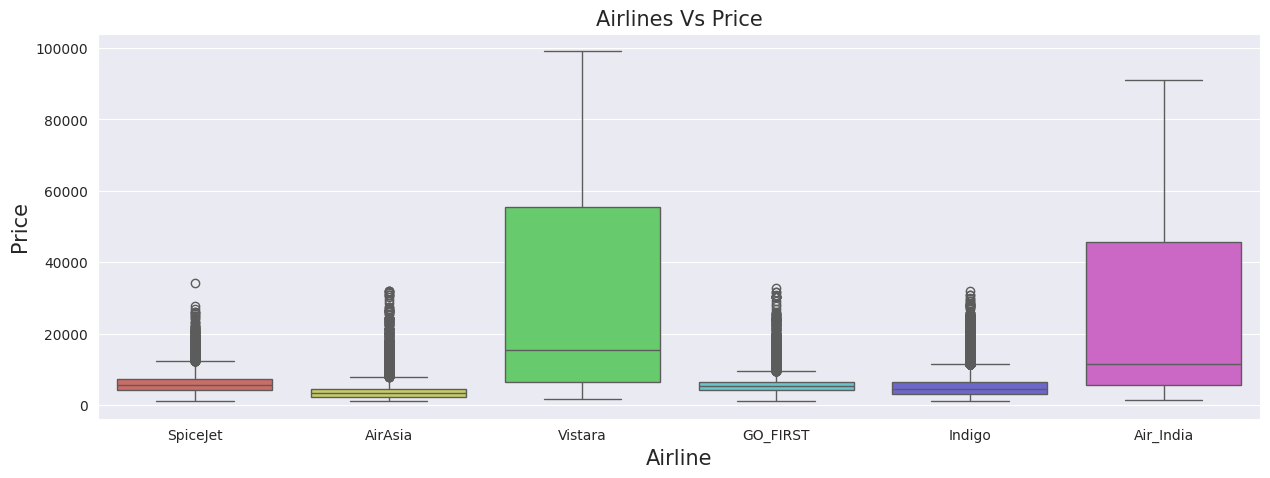

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

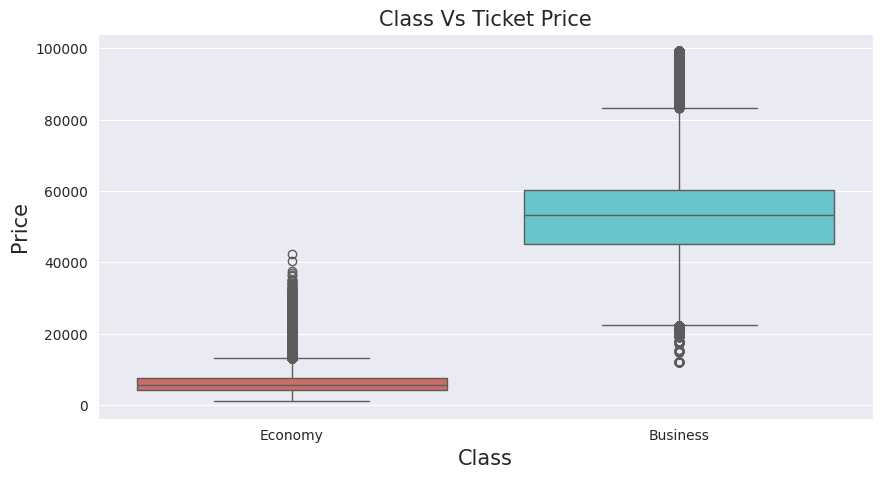

In [40]:


plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

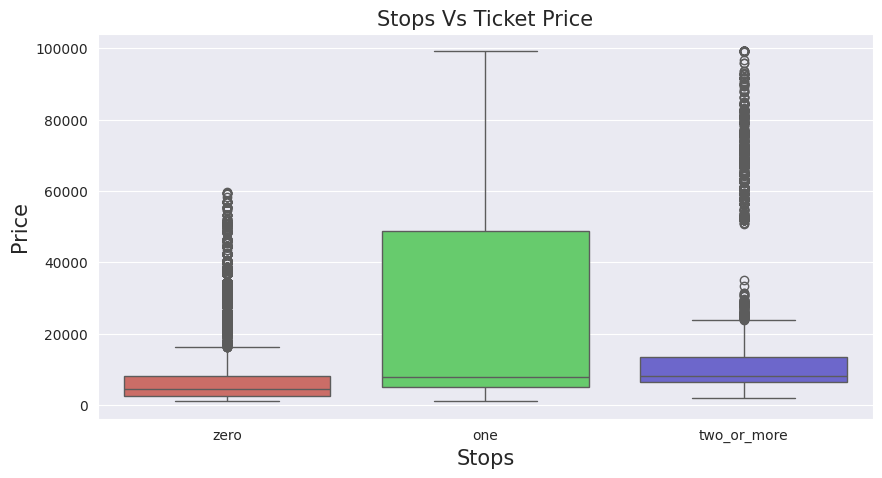

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

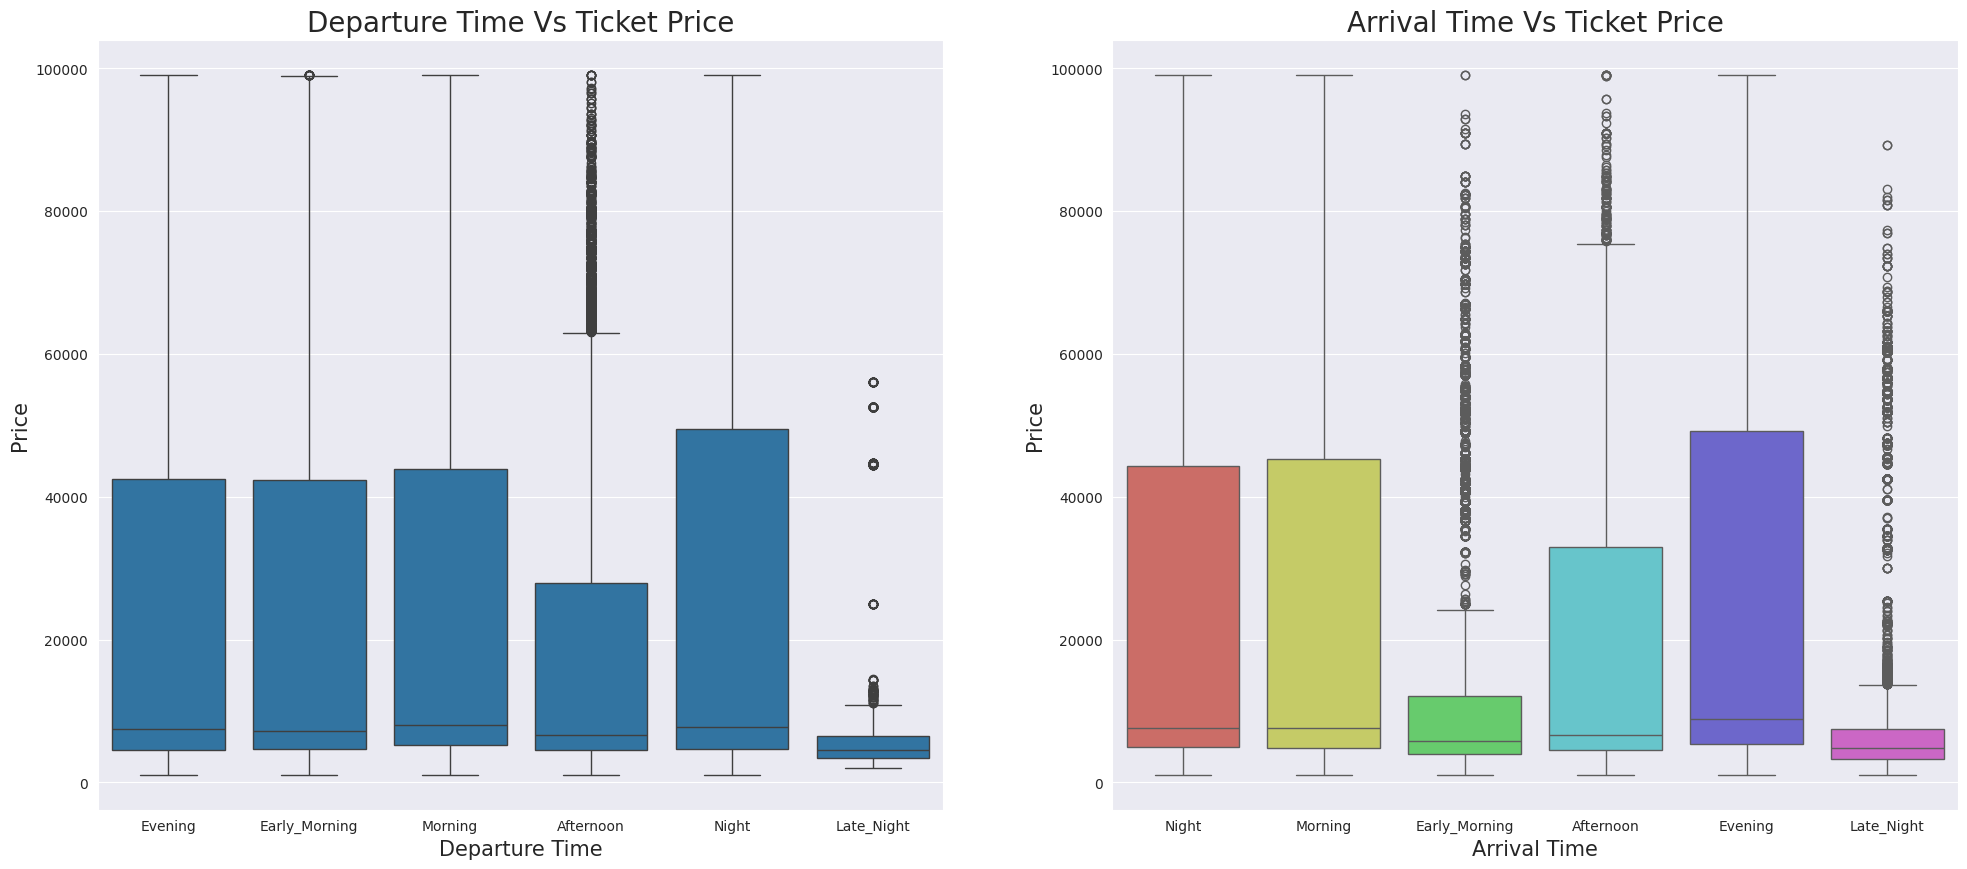

In [42]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


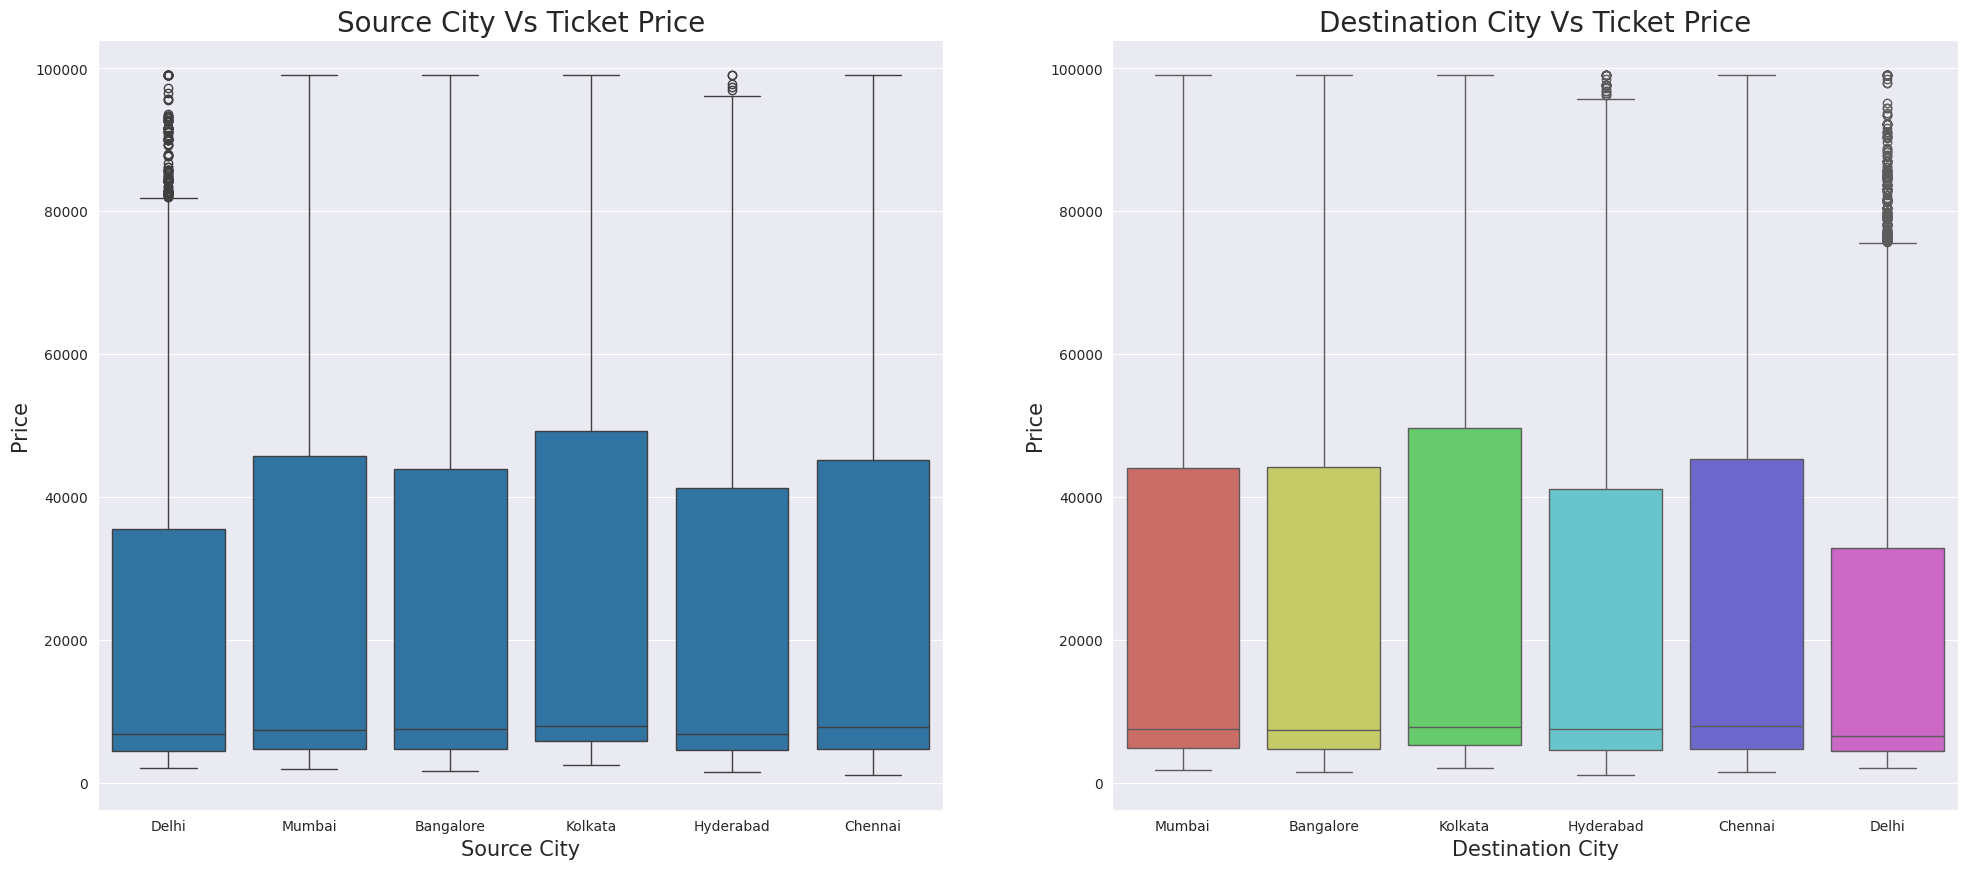

In [43]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

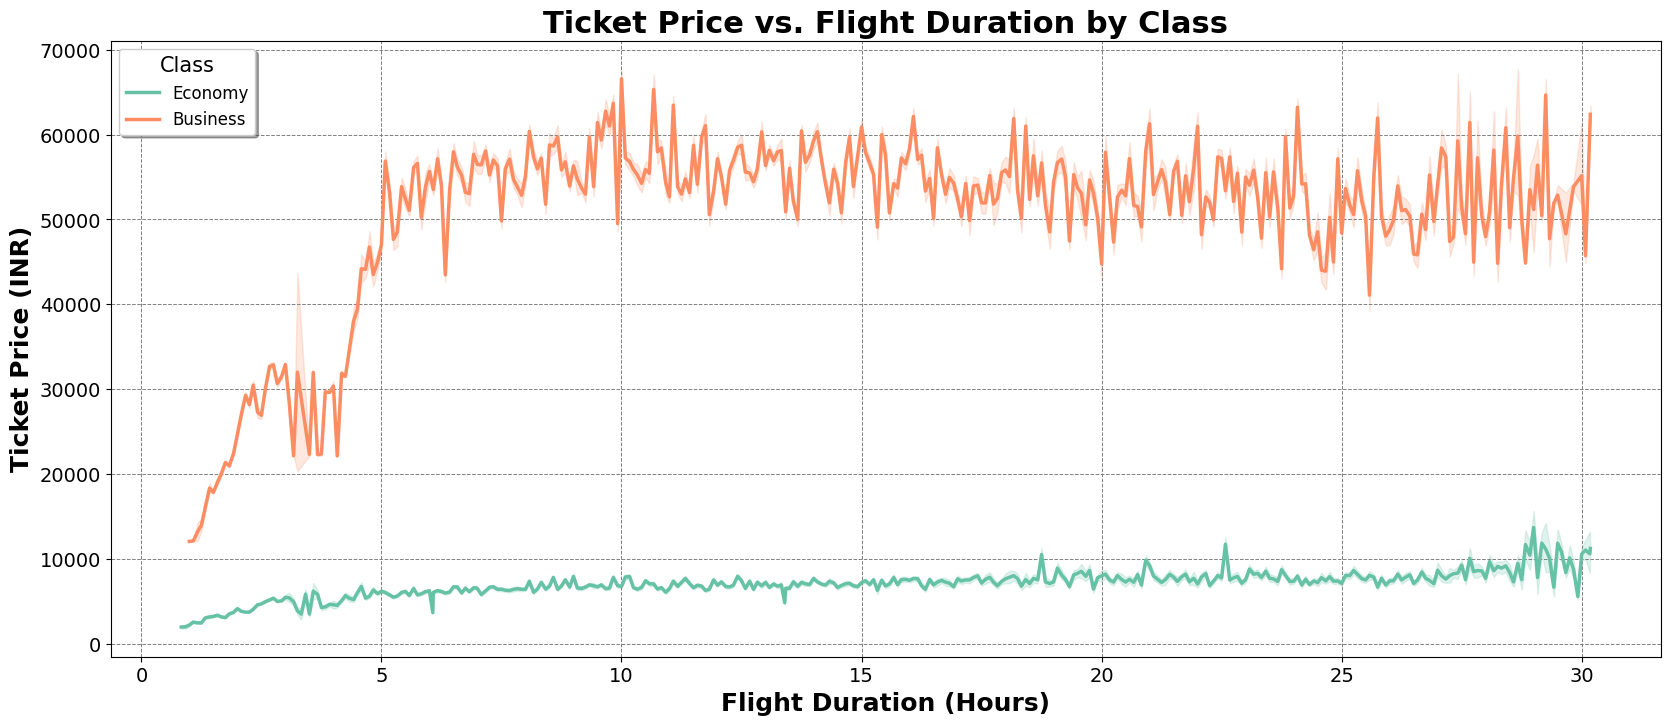

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

# Set figure size
plt.figure(figsize=(20,8))

# Seaborn line plot with enhanced visual features
sns.lineplot(
    data=df,
    x='duration',
    y='price',
    hue='class',
    palette='Set2',  # Light, visually appealing palette suitable for white background
    linewidth=2.5,   # Thicker lines for better visibility
    markers=True,    # Markers to emphasize points
    markerfacecolor='black', markeredgewidth=2  # Black markers for contrast
)

plt.title('Ticket Price vs. Flight Duration by Class', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Flight Duration (Hours)', fontsize=18, fontweight='bold', color='black')
plt.ylabel('Ticket Price (INR)', fontsize=18, fontweight='bold', color='black')

plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

plt.legend(title='Class', title_fontsize='15', loc='upper left', fontsize='12', frameon=True, shadow=True)

# Display the plot
plt.show()


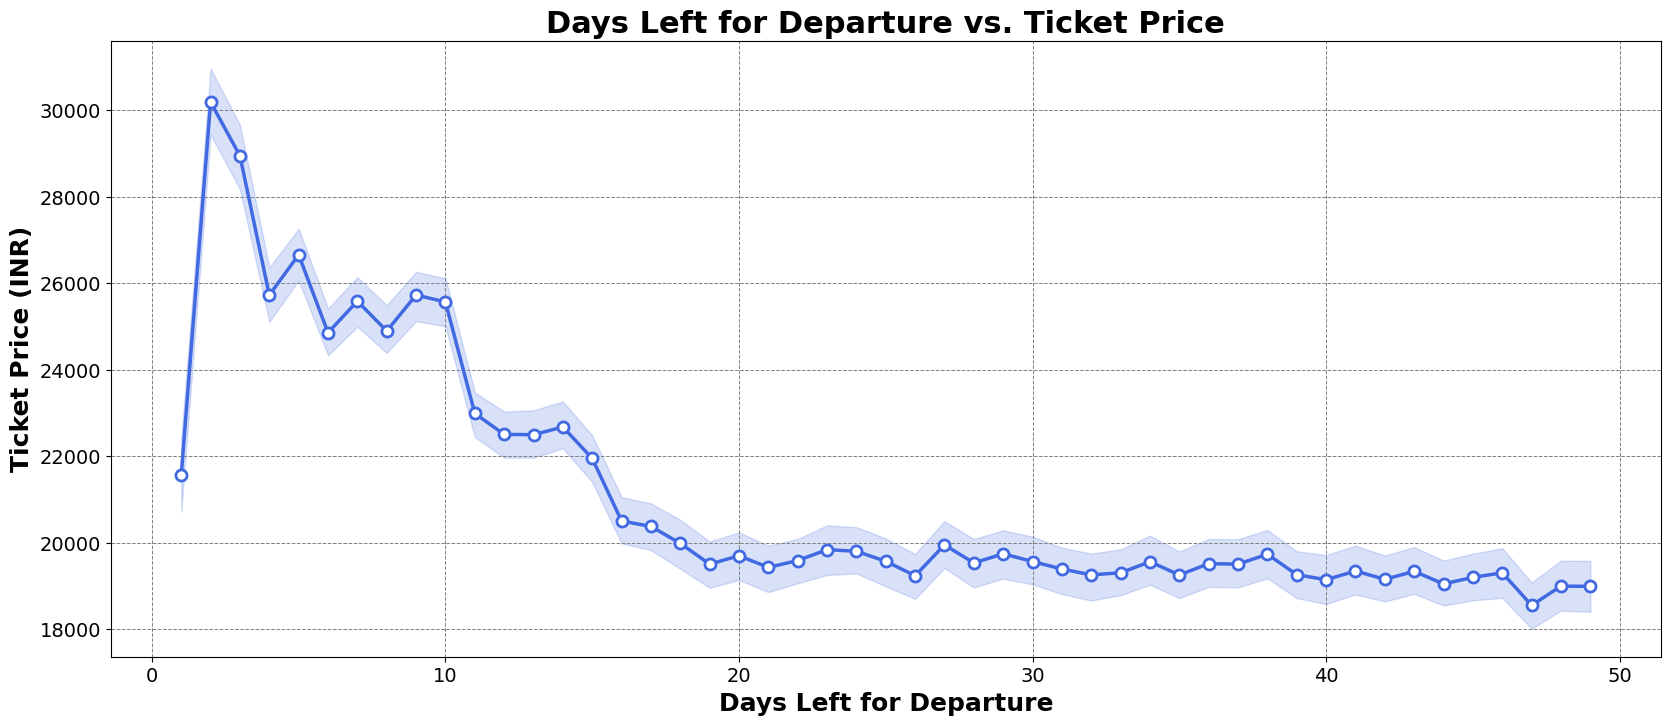

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

# Set figure size
plt.figure(figsize=(20,8))

sns.lineplot(
    data=df,
    x='days_left',
    y='price',
    color='royalblue',  # A more vibrant blue color that contrasts well with the white background
    linewidth=2.5,      # Thicker line for better visibility
    marker='o',         # circular markers to emphasize data points
    markersize=8,       # Adjust marker size for better visibility
    markerfacecolor='white', markeredgecolor='royalblue', markeredgewidth=2  # Contrast markers
)

plt.title('Days Left for Departure vs. Ticket Price', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Days Left for Departure', fontsize=18, fontweight='bold', color='black')
plt.ylabel('Ticket Price (INR)', fontsize=18, fontweight='bold', color='black')

# Adjust the font size for the tick labels and set their color to black
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

# light grid lines to improve readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Display the plot
plt.show()


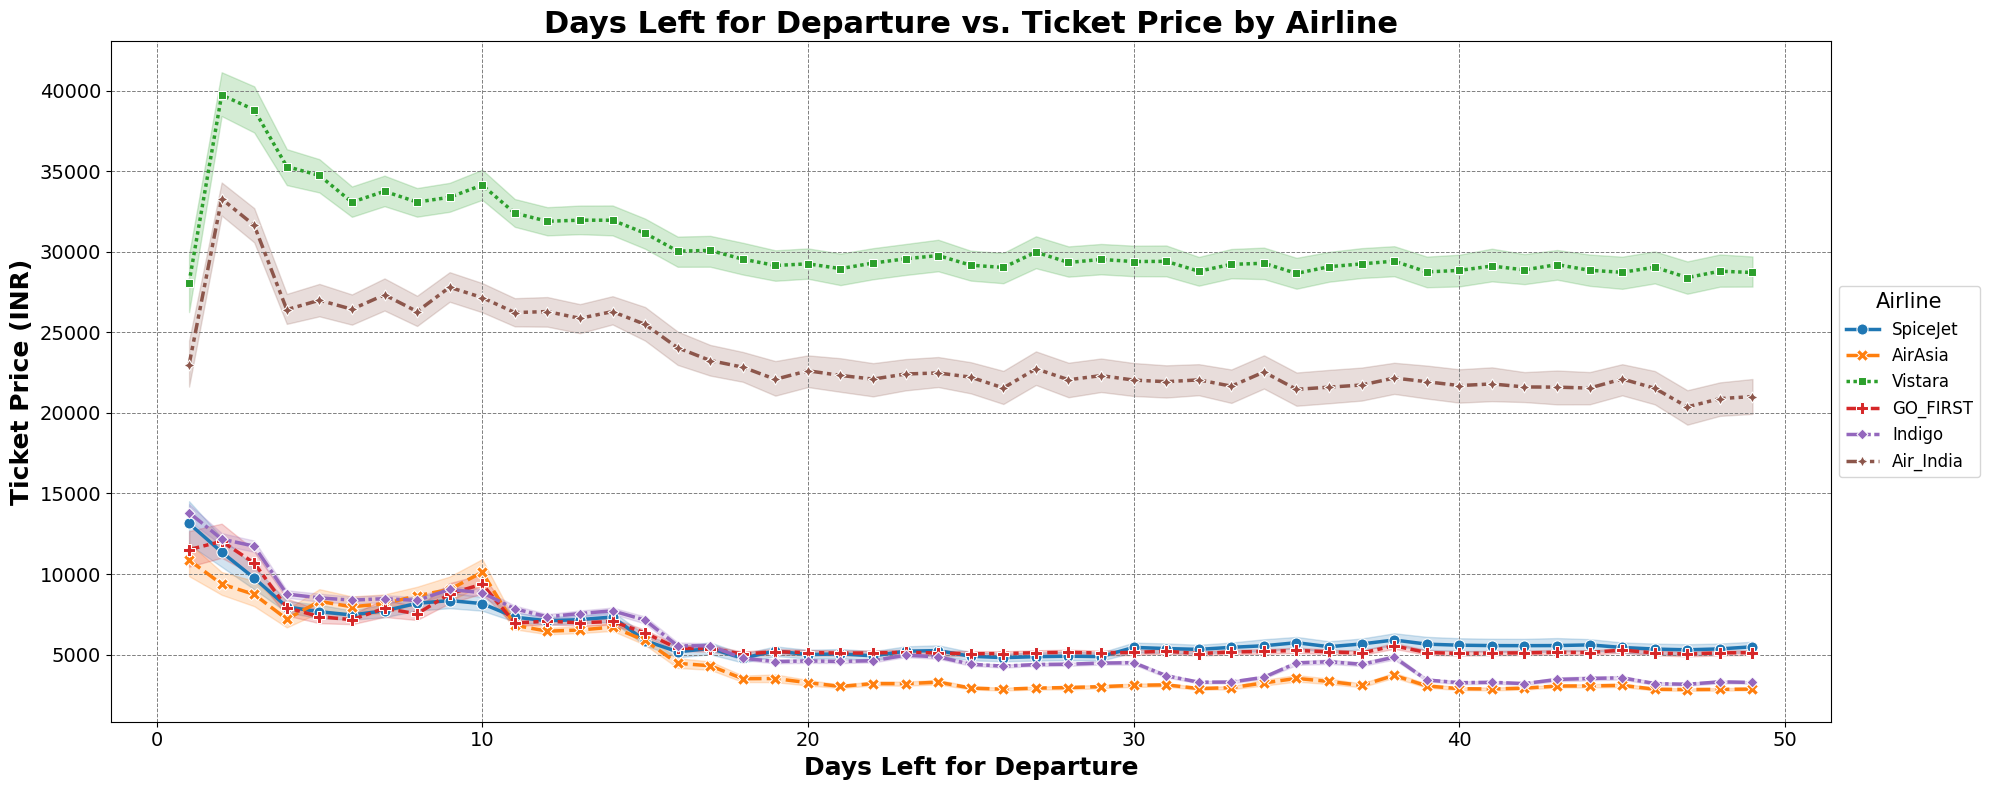

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

# Set figure size
plt.figure(figsize=(20,8))

sns.lineplot(
    data=df,
    x='days_left',
    y='price',
    hue='airline',          # Separate lines by airline
    palette='tab10',        # distinct color palette suitable for multiple airlines
    linewidth=2.5,          # Increase line thickness for better visibility
    markers=True,           # markers for emphasis
    style='airline',        # Different line styles for each airline
    markersize=8            # Adjust marker size
)

plt.title('Days Left for Departure vs. Ticket Price by Airline', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Days Left for Departure', fontsize=18, fontweight='bold', color='black')
plt.ylabel('Ticket Price (INR)', fontsize=18, fontweight='bold', color='black')

# Adjust the font size and color for the tick labels
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.legend(title='Airline', title_fontsize='15', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Display the plot
plt.tight_layout()  # Ensure the plot and legend fit well within the figure
plt.show()


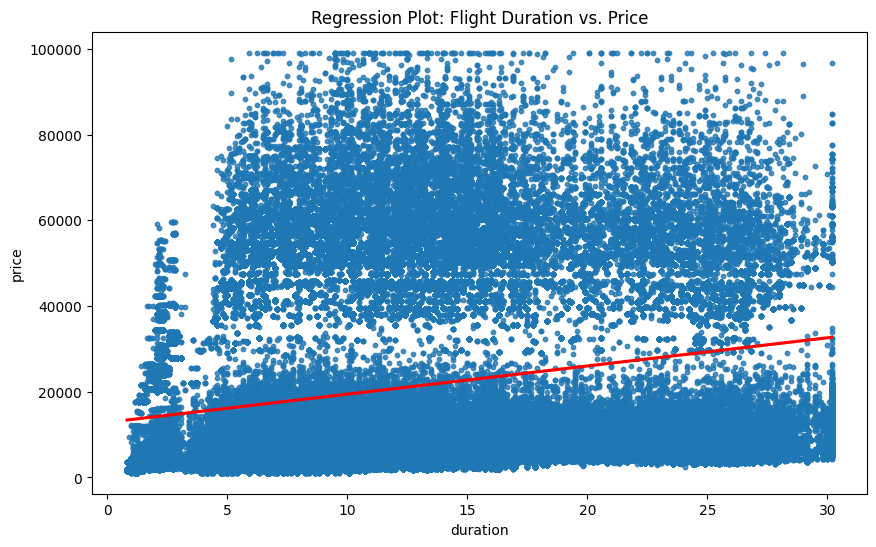

In [47]:
plt.figure(figsize=(10,6))
sns.regplot(x='duration', y='price', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Plot: Flight Duration vs. Price')
plt.show()


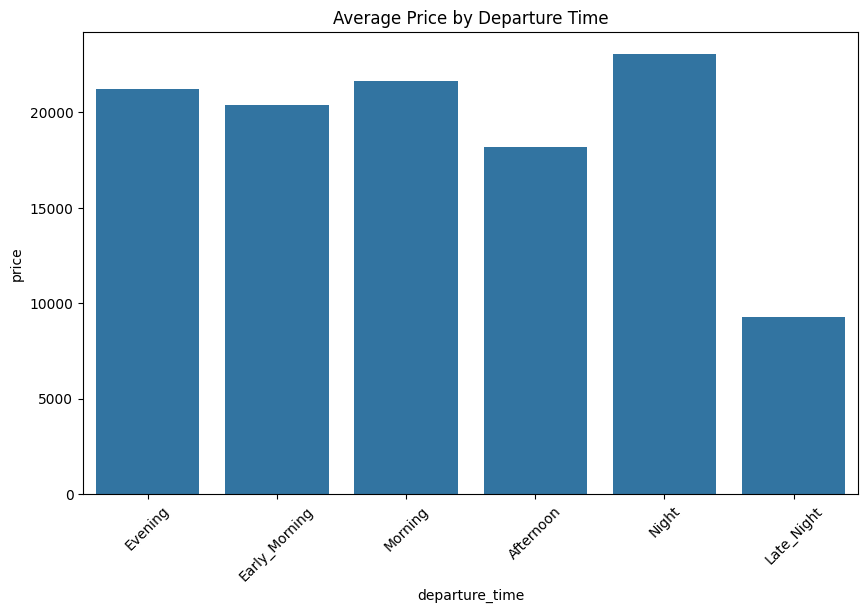

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='departure_time', y='price', data=df, ci=None)
plt.title('Average Price by Departure Time')
plt.xticks(rotation=45)
plt.show()


In [49]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [50]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()
label_encoder = LabelEncoder()

# Encoding categorical features to numeric format if the column type is 'object'
for column in df2.columns:
    if df2[column].dtype == 'object':  # Check if the column is categorical
        df2[column] = label_encoder.fit_transform(df2[column])

In [51]:
df2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


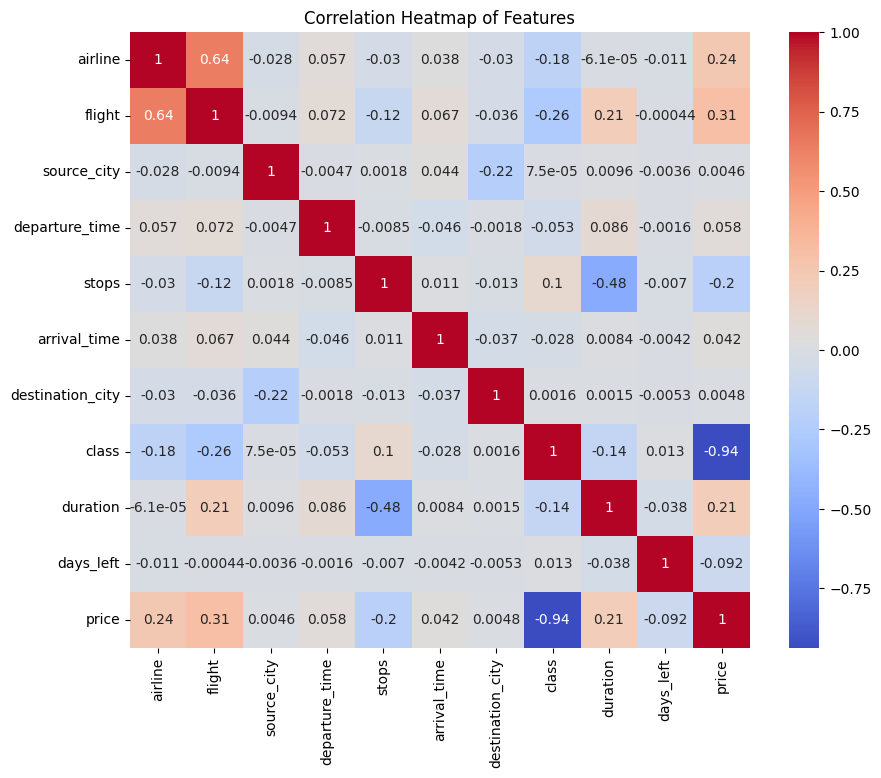

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()
